In [1]:
import numpy as np
from aotools.functions import phaseFromZernikes
  
def get_disk_mask(shape, radius, center = None):
    '''
    Generate a binary mask with value 1 inside a disk, 0 elsewhere
    :param shape: list of integer, shape of the returned array
    :radius: integer, radius of the disk
    :center: list of integers, position of the center
    :return: numpy array, the resulting binary mask
    '''
    if not center:
        center = (shape[0]//2,shape[1]//2)
    X,Y = np.meshgrid(np.arange(shape[0]),np.arange(shape[1]))
    mask = (Y-center[0])**2+(X-center[1])**2 < radius**2
    return mask.astype(np.int)
  
def complex_mask_from_zernike_coeff(shape, radius, center, vec):
    '''
    Generate a complex phase mask from a vector containting the coefficient of the first Zernike polynoms.
    :param DMD_resolution: list of integers, contains the resolution of the DMD, e.g. [1920,1200]
    :param: integer, radius of the illumination disk on the DMD
    :center: list of integers, contains the position of the center of the illumination disk
    :center: list of float, the coefficient of the first Zernike polynoms
    '''
    # Generate a complex phase mask from the coefficients
    zern_mask = np.exp(1j*phaseFromZernikes(vec,2*radius))
    # We want the amplitude to be 0 outside the disk, we fist generate a binary disk mask
    amp_mask = get_disk_mask([2*radius]*2,radius)
    # put the Zernik mask at the right position and multiply by the disk mask
    mask = np.zeros(shape = shape, dtype=np.complex)
    mask[center[0]-radius:center[0]+radius,
         center[1]-radius:center[1]+radius] = zern_mask*amp_mask
    return mask

In [3]:
complex_mask = complex_mask_from_zernike_coeff(shape = [1920,1200],
                                               radius = 350,
                                               center = [1920//2,1200//2],
                                               vec = [0.,0.,1.,2.,1.,5,0.75])

<IPython.core.display.Javascript object>


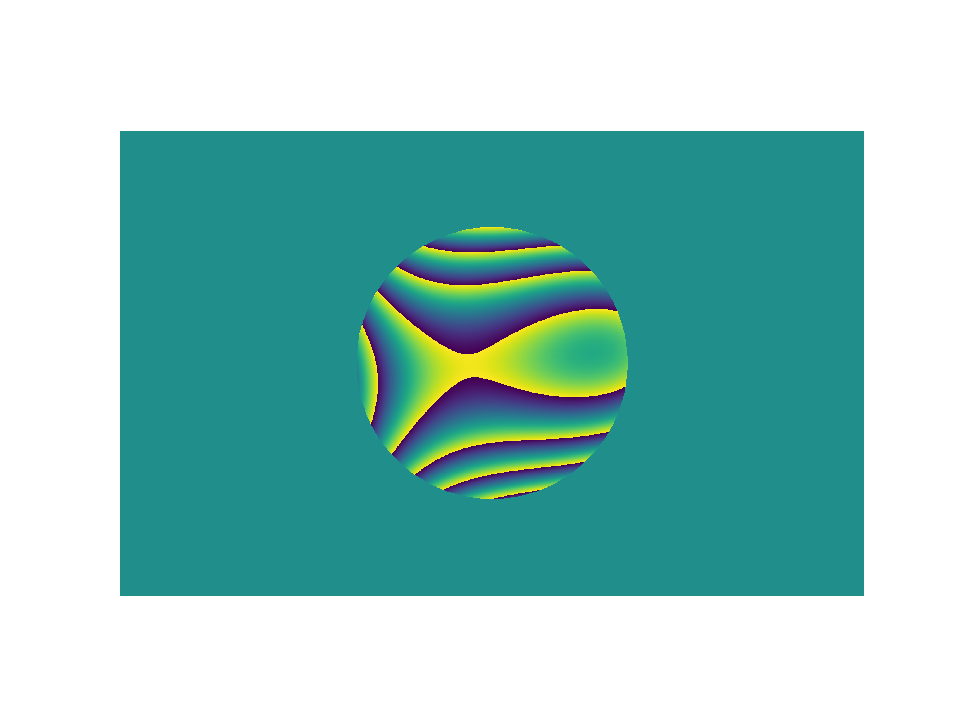

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure()
plt.imshow(np.angle(complex_mask).transpose())
plt.axis('off')
plt.savefig('zernike_example.png')

In [ ]:
def get_cost(imgs, mask_radius = 8, follow_spot = False,  show = False):
    '''

    '''
    res = imgs[0].shape
    mask_center = [res[0]//2,res[1]//2]
    X,Y = np.meshgrid(np.arange(res[0]),np.arange(res[1]))
    mask = (X-mask_center[0])**2+(Y-mask_center[1])**2 < mask_radius**2
    
    
    min_imgs = np.min(imgs)
    
    signal = np.array([np.sum((img-min_imgs)*mask)/np.sum(mask) for img in imgs])
    noise = np.array([np.sum((img-min_imgs)*(1.-mask))/np.sum(1.-mask) for img in imgs])
    cost = signal/noise
    return cost